## MACHINE_LEARNING_PROJECT_1_PREDICTING_PRICES_OF_AUTOMOBILE CARS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [141]:
df=pd.read_csv("Autodata.csv") ##Data Import
df

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [143]:
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [145]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Before we start with Exploratory Data analysis,let us know the importance of the features to filter out the features,on which the price is dependent majorly,and rest of the others can be focused minimally

In [146]:
## Dummification of categorical Variable
df1=pd.get_dummies(df,drop_first=True)
df1

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [147]:
X = df1.drop('price',axis=1)
X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [148]:
Y = df1['price']
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

#### Next importing Random forest for selection of features

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
rf_rg=RandomForestRegressor(n_estimators=500)
rf_rg

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [151]:
rf_model=rf_rg.fit(X_train,Y_train)
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [152]:
names=df1.dtypes.index
names

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       ...
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object', length=190)

In [153]:
print("feature importance score wise:")
w=pd.DataFrame(sorted(zip(map(lambda X:round(X,4),rf_model.feature_importances_),names),reverse=True))
w

feature importance score wise:


,0,1
0,0.6495,enginesize
1,0.2065,curbweight
2,0.0339,highwaympg
3,0.0216,horsepower
4,0.0135,wheelbase
...,...,...
184,0.0000,enginelocation_rear
185,0.0000,drivewheel_rwd
186,0.0000,cylindernumber_twelve
187,0.0000,cylindernumber_three


In [154]:
w.iloc[0:10]

,0,1
0,0.6495,enginesize
1,0.2065,curbweight
2,0.0339,highwaympg
3,0.0216,horsepower
4,0.0135,wheelbase
5,0.0113,peakrpm
6,0.0096,carwidth
7,0.0069,carlength
8,0.0049,make_bmw x5
9,0.0048,carheight


### Looking at above analysis on feature importance depending on score,we can observe,Engine size,curb weight,highway mpg,city mpg, wheel base,commpression ratio,horsepower,car width,fuel system are the major features we can look into for our prediction of price


In [155]:
df=df[['enginesize','make','curbweight','highwaympg','citympg','wheelbase','compressionratio','horsepower','carwidth','fueltype','price']]
df

,enginesize,make,curbweight,highwaympg,citympg,wheelbase,compressionratio,horsepower,carwidth,fueltype,price
0,130,alfa-romero giulia,2548,27,21,88.6,9.0,111,64.1,gas,13495.0
1,130,alfa-romero stelvio,2548,27,21,88.6,9.0,111,64.1,gas,16500.0
2,152,alfa-romero Quadrifoglio,2823,26,19,94.5,9.0,154,65.5,gas,16500.0
3,109,audi 100 ls,2337,30,24,99.8,10.0,102,66.2,gas,13950.0
4,136,audi 100ls,2824,22,18,99.4,8.0,115,66.4,gas,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,141,volvo 145e (sw),2952,28,23,109.1,9.5,114,68.9,gas,16845.0
201,141,volvo 144ea,3049,25,19,109.1,8.7,160,68.8,gas,19045.0
202,173,volvo 244dl,3012,23,18,109.1,8.8,134,68.9,gas,21485.0
203,145,volvo 246,3217,27,26,109.1,23.0,106,68.9,diesel,22470.0


### Lets capture exploratory data analysis on the above features,and as we can note,we dont have any missing values we can do Task 1 and Task 2 together

## TASK 1: Performing EDA on the DATA 
## TASK 2: Cleaning up

### Choosing Engine size based on feature importance

{'whiskers': [<matplotlib.lines.Line2D at 0x27cc51e6f08>,
 'caps': [<matplotlib.lines.Line2D at 0x27cc5207848>,
 'boxes': [<matplotlib.lines.Line2D at 0x27cc5202908>],
 'medians': [<matplotlib.lines.Line2D at 0x27cc52075c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27cc520fac8>],
 'means': []}

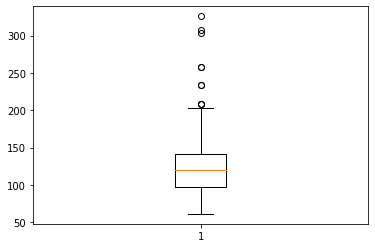

In [156]:
plt.boxplot(x='enginesize',data=df)

In [157]:
df['enginesize'].describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: enginesize, dtype: float64

#### As we can observe there is more gap between 3rd quartile and maximum value,so we need to update the data

In [158]:
Q1=df['enginesize'].quantile(q=0.25)
Q3=df['enginesize'].quantile(q=0.75)
print('25th percentile and 75 percentile are:',Q1,Q3)
IQR=Q3-Q1
print('Inter quartile range=',IQR)
upper_limit=1.5*IQR+Q3
print('Upper limit is :',upper_limit)
      

25th percentile and 75 percentile are: 97.0 141.0
Inter quartile range= 44.0
Upper limit is : 207.0


### As we can observe above,we can see outliers in engine size ,we can limit the data to 207 to handle outlier

In [159]:
df["enginesize"] = np.where(df["enginesize"] >207.0, 207.0,df['enginesize'])
df

,enginesize,make,curbweight,highwaympg,citympg,wheelbase,compressionratio,horsepower,carwidth,fueltype,price
0,130.0,alfa-romero giulia,2548,27,21,88.6,9.0,111,64.1,gas,13495.0
1,130.0,alfa-romero stelvio,2548,27,21,88.6,9.0,111,64.1,gas,16500.0
2,152.0,alfa-romero Quadrifoglio,2823,26,19,94.5,9.0,154,65.5,gas,16500.0
3,109.0,audi 100 ls,2337,30,24,99.8,10.0,102,66.2,gas,13950.0
4,136.0,audi 100ls,2824,22,18,99.4,8.0,115,66.4,gas,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,141.0,volvo 145e (sw),2952,28,23,109.1,9.5,114,68.9,gas,16845.0
201,141.0,volvo 144ea,3049,25,19,109.1,8.7,160,68.8,gas,19045.0
202,173.0,volvo 244dl,3012,23,18,109.1,8.8,134,68.9,gas,21485.0
203,145.0,volvo 246,3217,27,26,109.1,23.0,106,68.9,diesel,22470.0


{'whiskers': [<matplotlib.lines.Line2D at 0x27cc525b3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x27cc526bd88>,
 'boxes': [<matplotlib.lines.Line2D at 0x27cc5262f88>],
 'medians': [<matplotlib.lines.Line2D at 0x27cc526fcc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27cc526fe08>],
 'means': []}

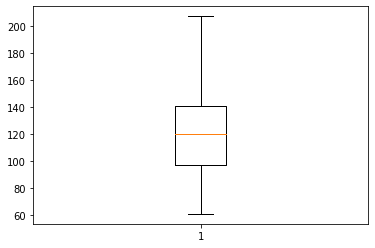

In [160]:
plt.boxplot(x='enginesize',data=df)

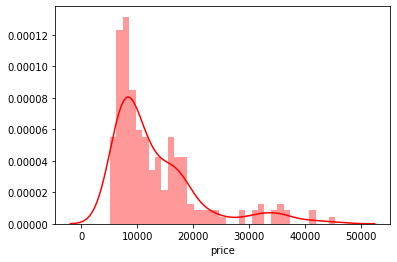

In [161]:
sns.distplot(df['price'],bins=35,color='red')

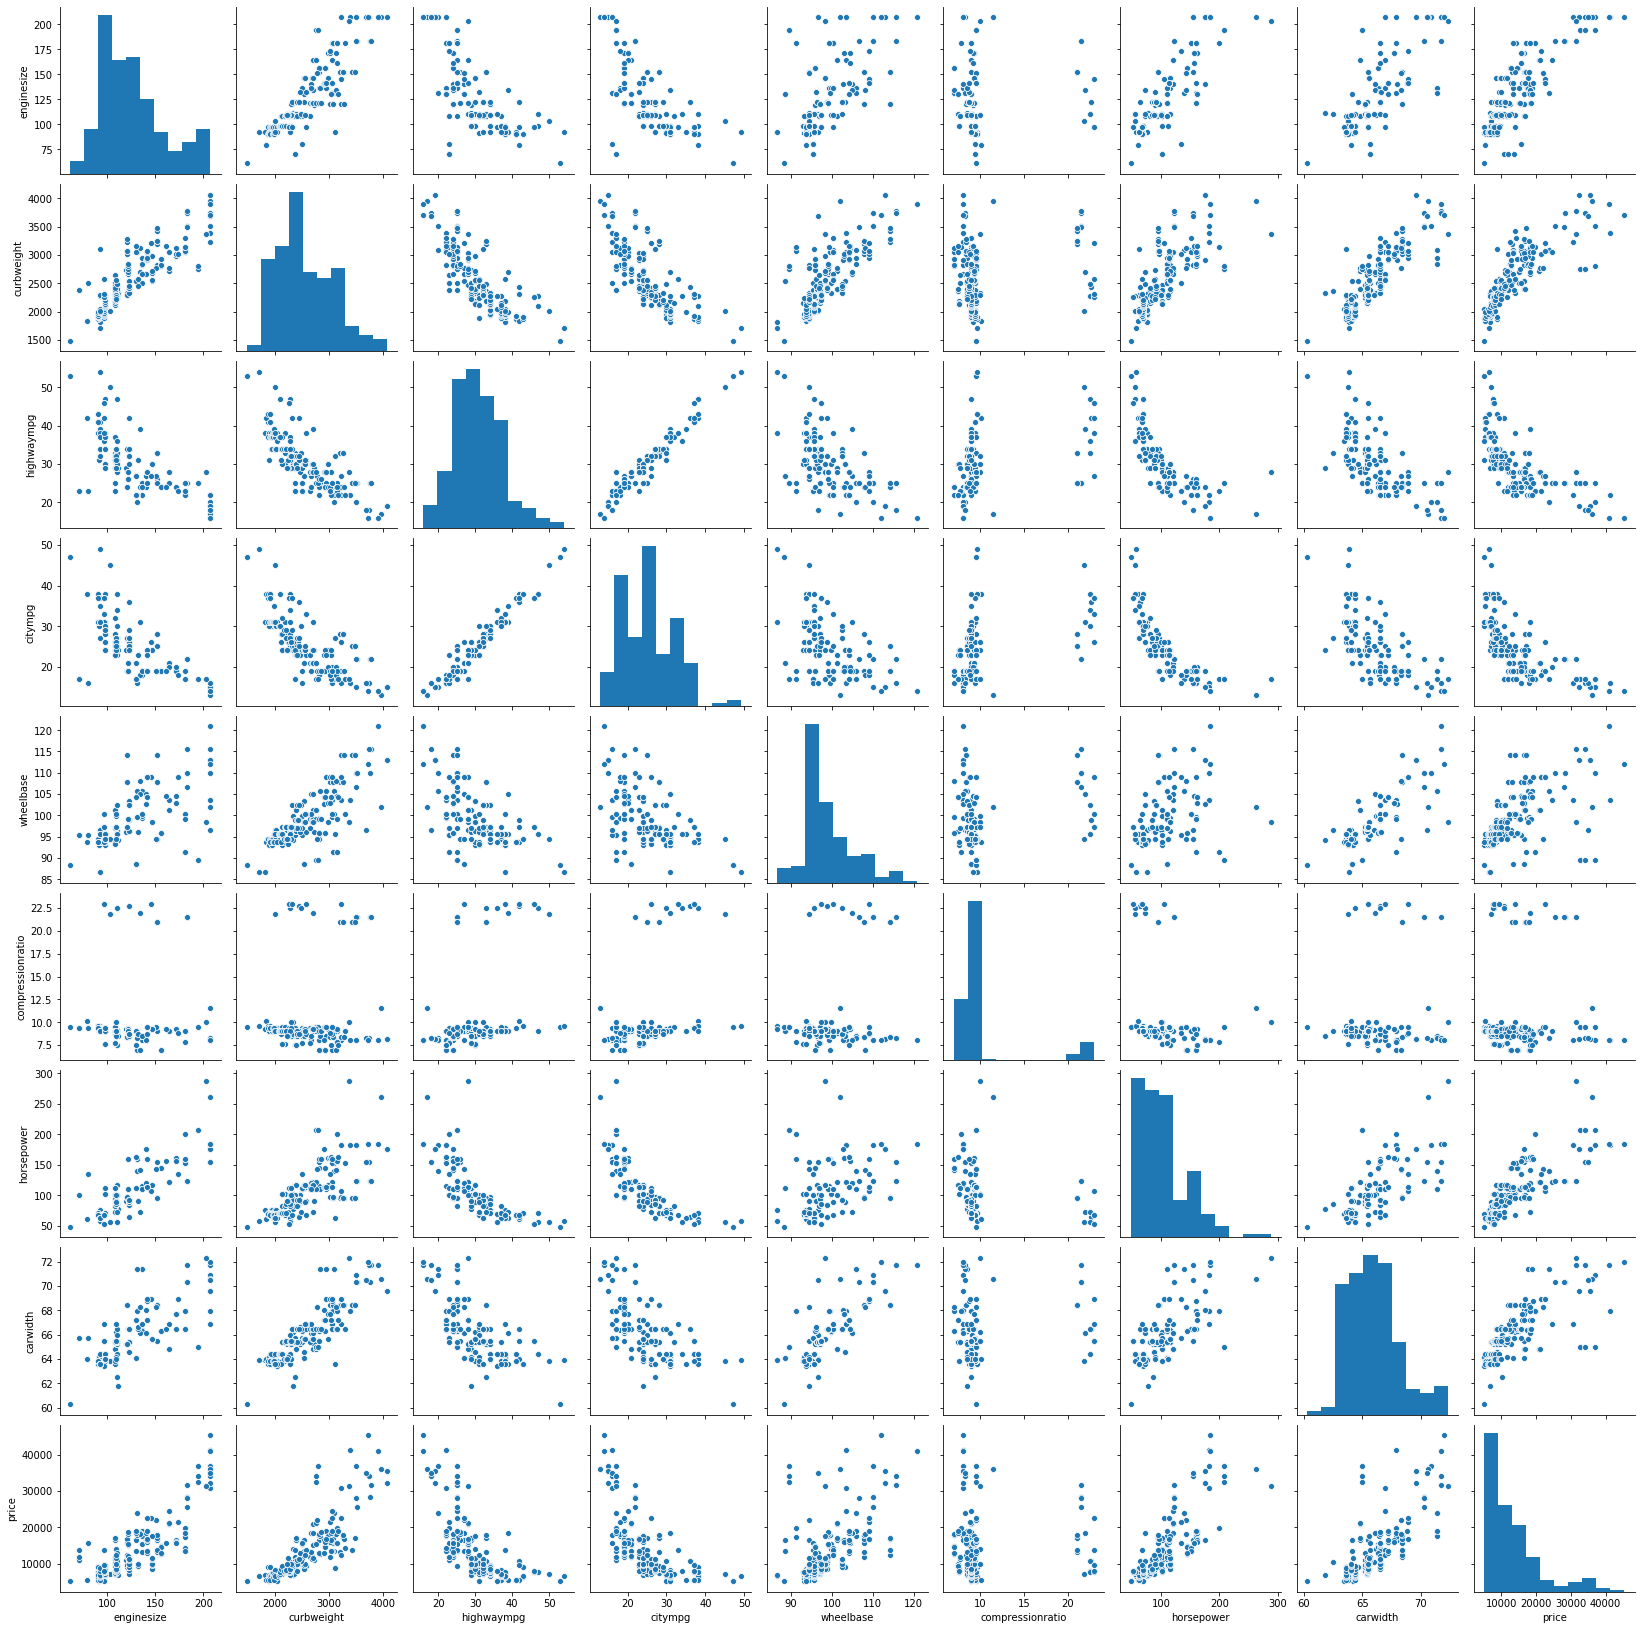

In [162]:
sns.pairplot(df)

### As we observe in above plots 'PRICE' is some what related to ENGINE SIZE,CURB WEIGHT,CAR WIDTH,HORSE POWER

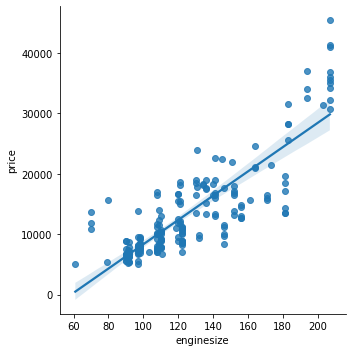

In [163]:
sns.lmplot(x='enginesize',y='price',data=df)

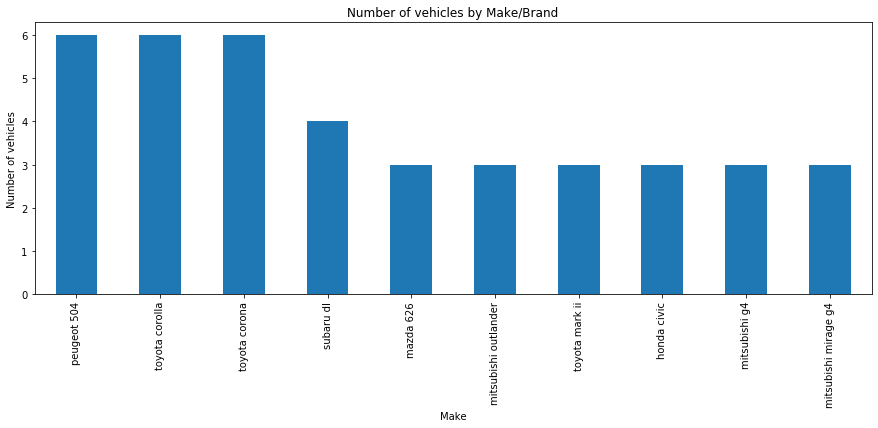

In [164]:
df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by Make/Brand")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

## TASK 3: Pick the best variable for making a simple linear regression model 

### Based on fearure importance score ,we will choose Engine size as best variable

In [165]:
x=df[['enginesize']]
y=df[['price']]

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [167]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
lm = linear_model.LinearRegression()

#### Create an instance of a LinearRegression() model named lm.

In [168]:
a=lm.fit(x_train,y_train)
a

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
a.intercept_

array([-10680.7570593])

In [170]:
a.coef_

array([[192.97456127]])

### Predicting Test Data
### Now that we have fit our model, let's evaluate its performance by predicting off the test values!

### ** Use lm.predict() to predict off the X_test set of the data.**

In [171]:
y_pred = a.predict(x_test)
y_pred

array([[24633.5876523 ],
       [28493.07887761],
       [ 8230.74994473],
       [ 8037.77538346],
       [ 7072.90257713],
       [ 7072.90257713],
       [24633.5876523 ],
       [12862.1394151 ],
       [ 6686.9534546 ],
       [12862.1394151 ],
       [ 6879.92801587],
       [ 8037.77538346],
       [16528.65607915],
       [10160.49555738],
       [10546.44467991],
       [29264.97712267],
       [ 6879.92801587],
       [12476.19029257],
       [19423.27449813],
       [24247.63852977],
       [12862.1394151 ],
       [12862.1394151 ],
       [29264.97712267],
       [10160.49555738],
       [ 8037.77538346],
       [12476.19029257],
       [10546.44467991],
       [ 8037.77538346],
       [16335.68151788],
       [ 7072.90257713],
       [12862.1394151 ],
       [29264.97712267],
       [10353.47011865],
       [ 7072.90257713],
       [10353.47011865],
       [29264.97712267],
       [24247.63852977],
       [ 6686.9534546 ],
       [ 8230.74994473],
       [ 6686.9534546 ],


## Evaluating the Model,Calculating residuals and 

### Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

### Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 

In [172]:
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
mse

14927751.301070217

In [173]:
import math
rmse= math.sqrt(mse)
rmse

3863.644820770954

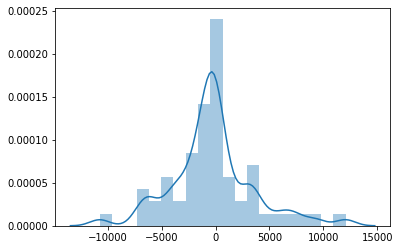

In [174]:
sns.distplot((y_test-y_pred),bins=20)

In [175]:
from sklearn.metrics import r2_score

In [176]:
r2_score(y_test,y_pred)

0.795820843199291

In [177]:
import statsmodels.api as sm

In [178]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              1631.
Date:                Tue, 31 Mar 2020   Prob (F-statistic):                    2.89e-99
Time:                        19:26:54   Log-Likelihood:                         -2043.5
No. Observations:                 205   AIC:                                      4089.
Df Residuals:                     204   BIC:                                      4092.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

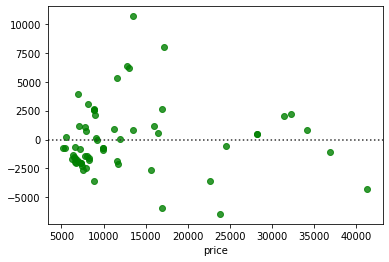

In [179]:
sns.residplot(y_test,y_pred, color="g")

## TASK 5: Build model using best variable and report the R2 
### Since we have to report 'R square value' of different variable in simple linear regression we will perform task 5 now and Task 4 later

### ii) Now we will use "curbweight" for our linear regression(2nd Independent variable)

In [180]:
x1=df[['curbweight']]
y1=df[['price']]

In [181]:
x1_train, x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.30)

In [182]:
a1=lm.fit(x1_train,y1_train)
a1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
y1_pred = a1.predict(x1_test)
y1_pred

array([[ 6304.18498622],
       [32559.96780722],
       [ 5463.79620533],
       [13065.49472334],
       [ 6062.25488263],
       [10582.52787073],
       [22195.17284296],
       [ 8850.81765557],
       [13231.02584685],
       [14529.80850822],
       [ 9614.80745637],
       [ 8035.89520138],
       [10544.32838069],
       [11524.78195839],
       [ 6113.18753602],
       [24461.67591869],
       [32559.96780722],
       [10964.52277113],
       [19686.73966365],
       [16579.84780705],
       [13269.22533689],
       [18044.16159192],
       [20654.46007801],
       [ 8914.4834723 ],
       [ 6469.71610973],
       [10073.20133686],
       [15344.73096241],
       [31082.920859  ],
       [ 2598.83445231],
       [ 9309.21153605],
       [ 8685.28653206],
       [12747.16563967],
       [19241.07894652],
       [ 9984.06919343],
       [ 9487.47582291],
       [25289.33153622],
       [ 5552.92834876],
       [12110.50747234],
       [16541.64831701],
       [18375.22383894],


In [184]:
mse = sklearn.metrics.mean_squared_error(y1_test,y1_pred)
rmse= math.sqrt(mse)
print(mse)
print(rmse)

20908604.93137992
4572.592801833542


In [185]:
r2_score(y1_test,y1_pred)

0.7183853998142025

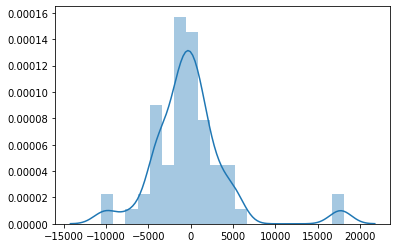

In [186]:
sns.distplot((y1_test-y1_pred),bins=20)

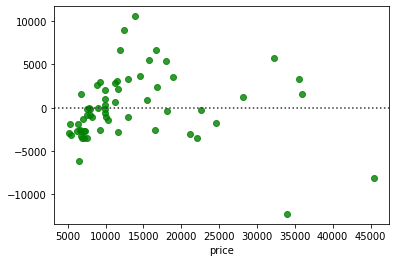

In [187]:
sns.residplot(y1_test,y1_pred, color="g")

### iii)Using "HighwayMPG" for the analysis(3rd Independent variable)

In [188]:
x2=df[['highwaympg']]
y2=df[['price']]

In [189]:
x2_train, x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.30)

In [190]:
a2=lm.fit(x2_train,y2_train)
a2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
y2_pred = a2.predict(x2_test)
y2_pred

array([[11429.73131086],
       [13046.98887716],
       [ 6577.95861198],
       [23559.16305808],
       [ 7386.58739513],
       [10621.10252772],
       [10621.10252772],
       [ 7386.58739513],
       [16281.50400975],
       [ 7386.58739513],
       [10621.10252772],
       [12238.36009401],
       [18707.39035919],
       [ 7386.58739513],
       [19516.01914234],
       [17898.76157604],
       [14664.24644345],
       [10621.10252772],
       [14664.24644345],
       [12238.36009401],
       [ 4152.07226253],
       [12238.36009401],
       [21941.90549178],
       [18707.39035919],
       [17898.76157604],
       [13855.61766031],
       [17898.76157604],
       [20324.64792549],
       [13855.61766031],
       [18707.39035919],
       [ 8195.21617827],
       [15472.8752266 ],
       [15472.8752266 ],
       [19516.01914234],
       [ 3343.44347939],
       [12238.36009401],
       [17898.76157604],
       [19516.01914234],
       [12238.36009401],
       [20324.64792549],


In [192]:
mse = sklearn.metrics.mean_squared_error(y2_test,y2_pred)
rmse= math.sqrt(mse)
print(mse)
print(rmse)

35614656.79487971
5967.801671878826


In [193]:
r2_score(y2_test,y2_pred)

0.3924141485135132

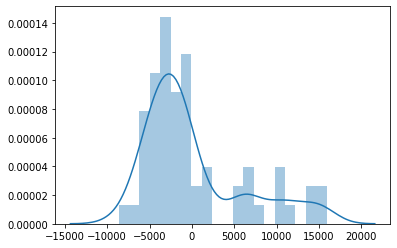

In [194]:
sns.distplot((y2_test-y2_pred),bins=20)

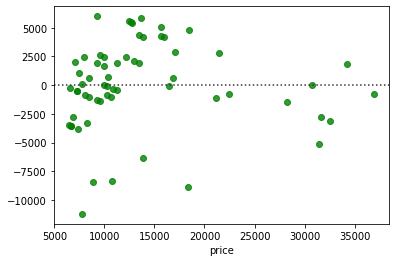

In [195]:
sns.residplot(y2_test,y2_pred, color="g")

### iv) Using 'citympg' for our next simple linear regressonn analysis(4th Independent variable)

In [196]:
x3=df[['citympg']]
y3=df[['price']]

In [197]:
x3_train, x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=0.30)

In [198]:
a3=lm.fit(x3_train,y3_train)
a3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [199]:
y3_pred=a3.predict(x3_test)
y3_pred

array([[18480.36872823],
       [ 8780.85363631],
       [ 8780.85363631],
       [16055.48995525],
       [11205.73240929],
       [15247.19703093],
       [ 8780.85363631],
       [10397.43948497],
       [21713.54042554],
       [20905.24750121],
       [ 3122.80316603],
       [16863.78287958],
       [18480.36872823],
       [20905.24750121],
       [ 8780.85363631],
       [18480.36872823],
       [ 8780.85363631],
       [12014.02533362],
       [ 3931.09609036],
       [20096.95457688],
       [ 9589.14656064],
       [13630.61118227],
       [18480.36872823],
       [ 7972.56071199],
       [18480.36872823],
       [15247.19703093],
       [16863.78287958],
       [12822.31825795],
       [14438.9041066 ],
       [18480.36872823],
       [18480.36872823],
       [ 8780.85363631],
       [ 8780.85363631],
       [12822.31825795],
       [ 8780.85363631],
       [ 8780.85363631],
       [18480.36872823],
       [ 8780.85363631],
       [16055.48995525],
       [14438.9041066 ],


In [200]:
mse = sklearn.metrics.mean_squared_error(y3_test,y3_pred)
rmse= math.sqrt(mse)
print(mse)
print(rmse)

40636285.426309206
6374.65963219286


In [201]:
r2_score(y3_test,y3_pred)

0.40089055968032106

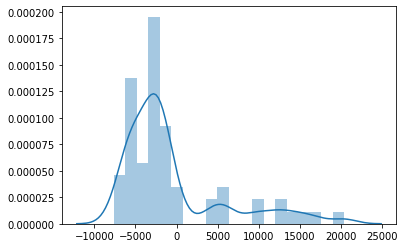

In [202]:
sns.distplot((y3_test-y3_pred),bins=20)

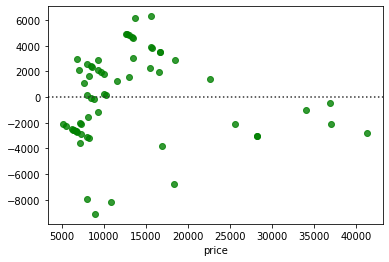

In [203]:
sns.residplot(y3_test,y3_pred, color="g")

### v) Using "horsepower" for our next simple linear regression analysis(5th Independent variable)

In [204]:
x4=df[['horsepower']]
y4=df[['price']]

In [205]:
x4_train, x4_test,y4_train,y4_test = train_test_split(x4,y4,test_size=0.30)

In [206]:
a4=lm.fit(x4_train,y4_train)
a4

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
y4_pred=a4.predict(x4_test)
y4_pred

array([[11441.38957927],
       [ 7303.57495432],
       [ 8417.60196873],
       [20831.04584357],
       [18602.99181475],
       [ 7144.42823798],
       [ 7462.72167067],
       [ 5234.66764185],
       [25287.15390121],
       [ 7144.42823798],
       [ 8417.60196873],
       [ 7303.57495432],
       [11441.38957927],
       [12237.12316099],
       [10963.94943024],
       [ 6189.54793991],
       [15897.4976369 ],
       [10963.94943024],
       [ 9690.77569948],
       [10645.65599755],
       [11759.68301196],
       [ 7144.42823798],
       [11441.38957927],
       [10327.36256486],
       [21785.92614164],
       [12396.26987733],
       [ 7303.57495432],
       [ 7144.42823798],
       [ 7144.42823798],
       [21785.92614164],
       [ 7144.42823798],
       [ 6189.54793991],
       [ 7462.72167067],
       [25287.15390121],
       [13828.59032443],
       [ 8417.60196873],
       [20990.19255992],
       [ 9690.77569948],
       [21945.07285798],
       [ 6189.54793991],


In [208]:
mse = sklearn.metrics.mean_squared_error(y4_test,y4_pred)
rmse= math.sqrt(mse)
print(mse)
print(rmse)

24814396.608997665
4981.4050838089515


In [209]:
r2_score(y4_test,y4_pred)

0.5978908055458931

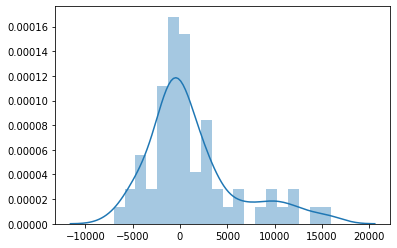

In [210]:
sns.distplot((y4_test-y4_pred),bins=20)

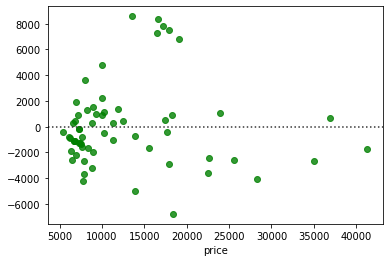

In [211]:
sns.residplot(y4_test,y4_pred, color="g")

### vi)Using "Carwidth" for our next simple linear regression analysis(6th Independent variable)

In [212]:
x5=df[['carwidth']]
y5=df['price']

In [213]:
x5_train, x5_test,y5_train,y5_test = train_test_split(x5,y5,test_size=0.30)

In [214]:
a5=lm.fit(x5_train,y5_train)

In [215]:
y5_pred=a5.predict(x5_test)
y5_pred

array([11661.69806753,  6727.18625802, 26739.37304103, 11661.69806753,
       28110.07076589, 19885.88441671, 11113.41897758,  6178.90716807,
        8920.3026178 , 16596.20987704, 14677.23306223, 11661.69806753,
       28110.07076589,  7275.46534796, 12209.97715747,  6727.18625802,
       11661.69806753,  6727.18625802, 14128.95397228, 11661.69806753,
       14677.23306223, 14677.23306223,  7275.46534796, 18515.18669185,
        7823.74443791, 13580.67488234,  7823.74443791, 10565.13988764,
        8920.3026178 , 10016.86079769, 28932.48940081, 19885.88441671,
        8372.02352786,  7549.60489294, 21256.58214158, 12484.11670245,
        8372.02352786, 10016.86079769, 11661.69806753, 28932.48940081,
       14677.23306223, 15773.79124212, 12484.11670245, 29754.90803573,
        8920.3026178 , 21256.58214158,  7275.46534796,  8920.3026178 ,
       14128.95397228, 14128.95397228, 10016.86079769, 14677.23306223,
        7275.46534796,  7823.74443791, 11661.69806753, 14403.09351726,
      

In [216]:
mse = sklearn.metrics.mean_squared_error(y5_test,y5_pred)
rmse= math.sqrt(mse)
print(mse)
print(rmse)

29983627.095454972
5475.730736208179


In [217]:
r2_score(y5_test,y5_pred)

0.6206525903675109

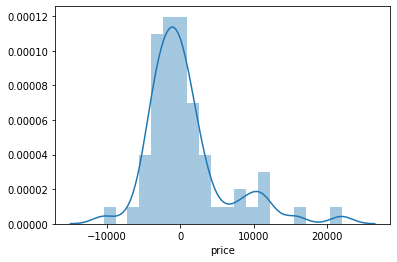

In [218]:
sns.distplot((y5_test-y5_pred),bins=20)

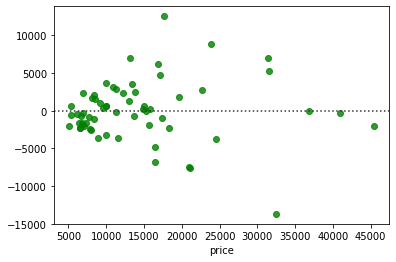

In [219]:
sns.residplot(y5_test,y5_pred, color="g")

### So we have calcullated simple linear regression for 5 differert independent variables
### below is the list of different 'R_Square' Values
### 1. Engine Size R2_value= 0.79
### 2. Curbweight R2_value= 0.71
### 3.HIghwaympg R2_value= 0.39
### 4. Citympg R2_value= 0.40
### 5. Horsepower R2_value= 0.60
### 5. Carwidth R2_value= 0.52

### By observing above R SQUARE values , we can consider "enginesize" as the best variable from the data

## TASK 4 :Performing train test split on the updated data

### we have to perform again test_train_split on the updated variables

In [220]:
df.head(2)

,enginesize,make,curbweight,highwaympg,citympg,wheelbase,compressionratio,horsepower,carwidth,fueltype,price
0,130.0,alfa-romero giulia,2548,27,21,88.6,9.0,111,64.1,gas,13495.0
1,130.0,alfa-romero stelvio,2548,27,21,88.6,9.0,111,64.1,gas,16500.0


In [221]:
x6=df[['enginesize','curbweight','highwaympg','citympg','horsepower','carwidth']]
y6=df['price']

In [222]:
x6_train, x6_test, y6_train, y6_test = train_test_split(x6,y6,test_size=0.30)

## TASK 6:Make a multiple regression model 
### Creating different regression algorithms for creating a model

### i) First we will build linear regression model

In [223]:
v=lm.fit(x6_train,y6_train)
v

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
y6_pred = v.predict(x6_test)
y6_pred

array([32840.51418592, 24319.35449977,  8090.38849068, 14050.73799513,
        5781.70750294,  7146.4754516 , 19296.35869104, 11181.59901396,
        9770.56490839, 24421.95724155, 20630.10494548,  9559.91119894,
        5787.61277318,  6147.16427876, 23072.23150949,  6684.63324591,
       17774.75580658,  9320.86122592,  9170.19416627,  7329.20672631,
        6399.77235257, 11014.9413875 ,  8124.33110594, 18290.85821309,
       12336.77922923, 23694.7208056 ,  6201.69910091,  6470.17408729,
       23893.53513428, 16667.61030645,  5244.43922425, 17466.79319294,
        6823.26765185,  9504.60279944,  6822.45612024, 31683.08684112,
       18741.69426304, 20457.93251169, 13178.72155353,  4888.51934315,
        5668.28248589,  5989.00149963, 24067.74544179, 18234.30120711,
       40797.09443619, 12389.09805846, 15618.44743801,  6510.02726549,
        9724.99779219, 22277.71399733,  8750.60006531,  5416.50368833,
       17825.3277219 , 24480.87351001,  6772.29933347, 20610.54890806,
      

In [225]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y6_test,y6_pred))
print('MSE:', metrics.mean_squared_error(y6_test,y6_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y6_test,y6_pred)))

MAE: 2962.8898384999247
MSE: 17198218.364817604
RMSE: 4147.0734699083405


In [226]:
r2_score(y6_test,y6_pred)

0.7231891405412435

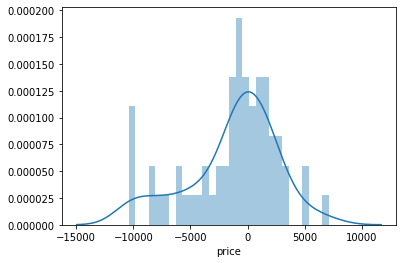

In [227]:
sns.distplot((y6_test-y6_pred),bins=30)

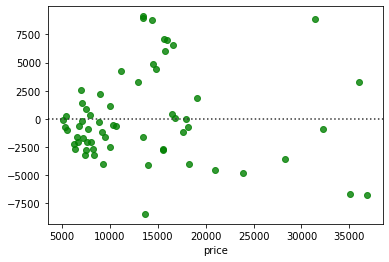

In [228]:
sns.residplot(y6_test,y6_pred, color="g")

## ii) Now lets use KNN algorithm 

In [229]:
x7=df[['enginesize','curbweight','highwaympg','citympg','horsepower','carwidth']]
y7=df['price']

In [230]:
from sklearn.neighbors import KNeighborsRegressor

In [231]:
knn = KNeighborsRegressor(n_neighbors=10,metric='euclidean')

In [232]:
x7_train, x7_test, y7_train,y7_test = train_test_split(x7,y7,test_size=0.30)

In [233]:
v1=knn.fit(x7_train,y7_train)
v1

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [234]:
y7_pred=v1.predict(x7_test)
y7_pred

array([ 8125.8   ,  7880.5   ,  6801.6   , 10595.9   , 16904.7167,
       16984.3   , 26516.05  ,  8327.3   ,  9066.1   , 18816.2   ,
       17415.4   ,  8594.9   ,  6661.5   ,  7949.    , 32592.65  ,
       15819.    , 11783.6   , 16862.3   , 16297.7   ,  6406.85  ,
       11557.9   ,  8353.5   , 12026.8   ,  7005.6   ,  8594.9   ,
       22642.25  , 15819.    , 19266.5167,  8281.    , 18681.9167,
        6655.1   , 16984.3   ,  6538.8   ,  6567.2   , 15887.9   ,
       14786.6   , 17415.4   , 10949.5   ,  8476.7   ,  9066.1   ,
        6567.2   , 16810.5   , 32592.65  , 12026.8   ,  8594.9   ,
       16984.3   , 12026.8   , 18320.8   , 18466.3167, 10949.5   ,
       32592.65  ,  6567.2   , 32592.65  , 12016.9   , 17405.6   ,
        6679.6   ,  8236.8   ,  6955.6   , 16862.3   , 18429.1167,
       11044.5   ,  7964.2   ])

In [235]:
print('MAE:', metrics.mean_absolute_error(y7_test,y7_pred))
print('MSE:', metrics.mean_squared_error(y7_test,y7_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y7_test,y7_pred)))

MAE: 2759.671508064517
MSE: 20815541.981216043
RMSE: 4562.405284629594


In [236]:
r2_score(y7_test,y7_pred)

0.7269637334323843

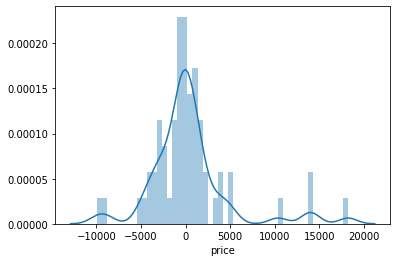

In [237]:
sns.distplot((y7_test-y7_pred),bins=50)

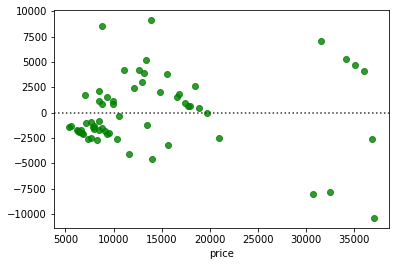

In [238]:
sns.residplot(y7_test,y7_pred, color="g")

## iii) Using Random Forest Algorithm 

In [239]:
from sklearn.ensemble import RandomForestRegressor

In [240]:
rfr = RandomForestRegressor(n_estimators=500)

In [241]:
x8=df[['enginesize','curbweight','highwaympg','citympg','horsepower','carwidth']]
y8=df['price']

In [242]:
x8_train, x8_test, y8_train, y8_test = train_test_split(x8,y8,test_size=0.30)

In [243]:
v2=rfr.fit(x8_train,y8_train)
v2

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [244]:
y8_pred=v2.predict(x8_test)
y8_pred

array([33041.04542857, 15315.526     ,  7864.87113333,  7548.38286667,
       17743.392     , 11960.128     , 31844.137     ,  7209.0635    ,
        6654.77901667,  6370.81496667, 33306.01342857,  7785.38936667,
       11613.34066667, 17411.91      ,  8100.49      , 15920.706     ,
       12369.79133333, 13852.528     , 10522.00633333, 21154.36      ,
       10522.00633333,  7407.63265   , 21202.756     , 16610.959     ,
       15315.526     ,  5744.9295    ,  7110.70225   ,  7705.54078333,
        6372.63563333, 27975.116     , 15371.834     , 10389.52933333,
       11235.31066667,  6781.458     , 17998.6425    , 21294.725     ,
       10619.17566667,  8652.196     , 16274.358     , 16128.06133333,
        8533.12      ,  9877.82266667, 20741.004     , 18124.422     ,
       12524.351     ,  8432.50475   ,  7710.268     , 10566.681     ,
       16488.938     ,  7678.2088    , 37944.355     ,  8196.828     ,
       16140.09933333,  9764.195     , 16510.47      , 16411.046     ,
      

In [245]:
print('MAE:', metrics.mean_absolute_error(y8_test,y8_pred))
print('MSE:', metrics.mean_squared_error(y8_test,y8_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y8_test,y8_pred)))

MAE: 1818.8867897465434
MSE: 6945295.007280271
RMSE: 2635.392761483622


In [246]:
r2_score(y8_test,y8_pred)

0.913103361399144

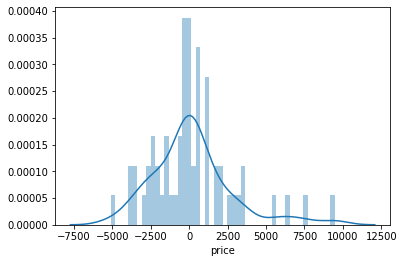

In [247]:
sns.distplot((y8_test-y8_pred),bins=50)

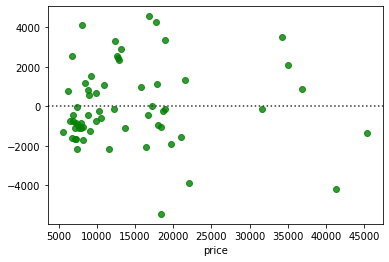

In [248]:
sns.residplot(y8_test,y8_pred, color="g")

## iv) Using Decision Tree Algorithm 

In [249]:
from sklearn.tree import DecisionTreeRegressor

In [250]:
dtree=DecisionTreeRegressor()

In [251]:
x9=df[['enginesize','curbweight','highwaympg','citympg','horsepower','carwidth']]
y9=df['price']

In [252]:
x9_train, x9_test, y9_train, y9_test = train_test_split(x9,y9,test_size=0.30)

In [253]:
v3=dtree.fit(x9_train,y9_train)
v3

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [254]:
y9_pred=v3.predict(x9_test)
y9_pred

array([ 9988. ,  7349. , 15750. ,  7349. , 11850. ,  8916.5,  7975. ,
        8058. ,  9370. ,  5499. , 12290. ,  7053. ,  9538. ,  6338. ,
        7609. , 11850. , 16695. ,  5348. ,  7995. ,  6229. , 17075. ,
       17075. ,  6849. , 28248. , 14489. , 16630. , 12290. , 15750. ,
       13200. ,  9370. , 12940. , 16500. ,  6989. ,  6938. ,  9370. ,
        5572. ,  7957. ,  6229. ,  8058. ,  7957. ,  7898. , 18420. ,
        9960. , 18620. , 16925. , 12764. , 10345. , 11850. , 16925. ,
        6095. ,  7609. , 10345. ,  7299. , 15998. , 13200. , 35056. ,
        7349. ,  7609. , 11245. , 33278. , 18344. ,  6229. ])

In [255]:
print('MAE:', metrics.mean_absolute_error(y9_test,y9_pred))
print('MSE:', metrics.mean_squared_error(y9_test,y9_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y9_test,y9_pred)))

MAE: 1580.475806451613
MSE: 5468456.810483871
RMSE: 2338.473179338149


In [256]:
r2_score(y9_test,y9_pred)

0.8816593347378108

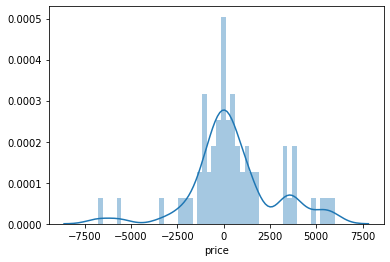

In [257]:
sns.distplot((y9_test-y9_pred),bins=50)

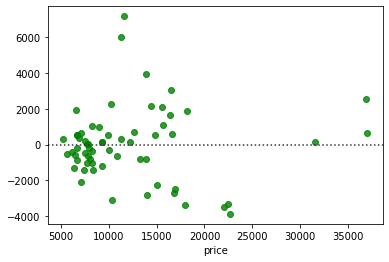

In [258]:
sns.residplot(y9_test,y9_pred, color="g")

## TASK 7:   What is your understanding of the factors that drive price? 

In [329]:
df[['make','price','enginesize']].max()

make          vw rabbit
price             45400
enginesize          207
dtype: object

#### Price depending on the make of the automobile   
- The most expensive car is manufacture by VW Rabbit

### Scatter plot of price and engine size

- Findings: The more the engine size the costlier the price is

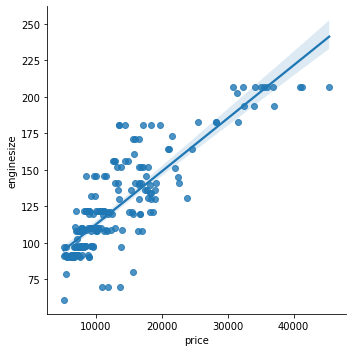

In [330]:
g = sns.lmplot('price',"enginesize", df)

### FINAL- MODEL:
### Of all the Algorithm,Random forest is very useful in prediction, with R2 value always more than 0.80 / 80%

- Enginesize plays a major role in the price of the car,according to this data,higher the enginesize higher is the price of the car

## Price Factors:

1. Price is more correlated with engine size and curb weight of the car 
2. Curb weight is mostly correlated with engine size, length, width and wheel base ,obviously these adds up the weight of car
3. The most expensive car is VW Rabbit
4. Higher the engine size higher the price

## Key take-a-ways from the project:

- Price : Factors affecting Price of the Automobile.
- How the data set are distributed
- Correlation between different fields and how they are related 
- Symboling : Cars are initially assigned a risk factor symbol associated with its price
- Mileage based on City and Highway are hihgly correlated